In [ ]:
import io
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
token = "<REMOVED>" # your token goes here
market = "SOL-USD"

In [ ]:
resp = requests.get(f'https://eodhistoricaldata.com/api/eod/{market}.CC?api_token={token}&order=d&fmt=json')
json_data = json.loads(resp.content)
df = pd.DataFrame(json_data)
df

,date,open,high,low,close,adjusted_close,volume
0,2021-10-27,205.6002,207.2313,204.8188,207.2313,207.2313,2041711245
1,2021-10-26,209.6660,213.2438,204.3240,205.6569,205.6569,2025734999
2,2021-10-25,202.6277,218.2283,198.9199,209.8943,209.8943,2949170257
3,2021-10-24,197.8658,204.4041,186.6362,201.9678,201.9678,2092675554
4,2021-10-23,196.3750,205.1230,193.3462,197.6925,197.6925,1930570185
...,...,...,...,...,...,...,...
560,2020-04-15,0.6693,0.7050,0.6215,0.6467,0.6467,13075275
561,2020-04-14,0.7778,0.7965,0.6282,0.6619,0.6619,16747614
562,2020-04-13,0.8908,0.8916,0.7740,0.7778,0.7778,18211285
563,2020-04-12,0.7854,0.9567,0.7624,0.8825,0.8825,38736897


In [ ]:
df = df.iloc[::-1].reset_index()
df.drop(columns=['index'], inplace=True)
df.set_index(['date'], inplace=True)
df

,open,high,low,close,adjusted_close,volume
date,,,,,,
2020-04-11,0.9511,1.0491,0.7650,0.7768,0.7768,43862444
2020-04-12,0.7854,0.9567,0.7624,0.8825,0.8825,38736897
2020-04-13,0.8908,0.8916,0.7740,0.7778,0.7778,18211285
2020-04-14,0.7778,0.7965,0.6282,0.6619,0.6619,16747614
2020-04-15,0.6693,0.7050,0.6215,0.6467,0.6467,13075275
...,...,...,...,...,...,...
2021-10-23,196.3750,205.1230,193.3462,197.6925,197.6925,1930570185
2021-10-24,197.8658,204.4041,186.6362,201.9678,201.9678,2092675554
2021-10-25,202.6277,218.2283,198.9199,209.8943,209.8943,2949170257


In [ ]:
df["sma50"] = df["close"].rolling(50, min_periods=50).mean()
df["sma200"] = df["close"].rolling(200, min_periods=200).mean()
df.fillna(0, inplace=True)
df

,open,high,low,close,adjusted_close,volume,sma50,sma200
date,,,,,,,,
2020-04-11,0.9511,1.0491,0.7650,0.7768,0.7768,43862444,0.000000,0.000000
2020-04-12,0.7854,0.9567,0.7624,0.8825,0.8825,38736897,0.000000,0.000000
2020-04-13,0.8908,0.8916,0.7740,0.7778,0.7778,18211285,0.000000,0.000000
2020-04-14,0.7778,0.7965,0.6282,0.6619,0.6619,16747614,0.000000,0.000000
2020-04-15,0.6693,0.7050,0.6215,0.6467,0.6467,13075275,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2021-10-23,196.3750,205.1230,193.3462,197.6925,197.6925,1930570185,158.057060,71.165450
2021-10-24,197.8658,204.4041,186.6362,201.9678,201.9678,2092675554,159.304160,72.042898
2021-10-25,202.6277,218.2283,198.9199,209.8943,209.8943,2949170257,160.659510,72.957200


sample_data  sol.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

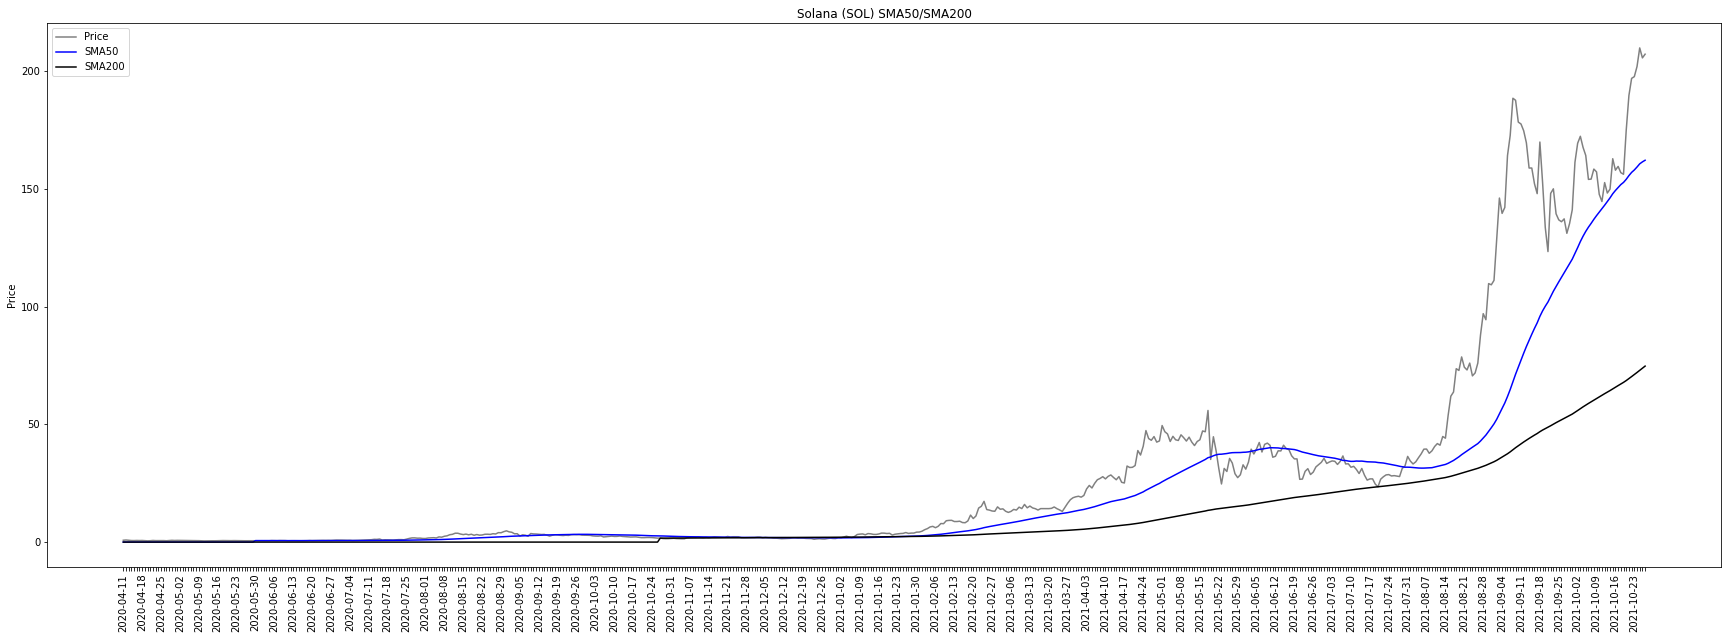

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df["close"], color="grey", label="Price")
plt.plot(df["sma50"], color="blue", label="SMA50")
plt.plot(df["sma200"], color="black", label="SMA200")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("Solana (SOL) SMA50/SMA200")
ax = plt.gca()
for index, label in enumerate(ax.xaxis.get_ticklabels()):
  if index % 7 != 0:
    label.set_visible(False)
plt.legend()
plt.savefig("sol.jpg", bbox_inches="tight")
!dir
files.download("sol.jpg")
plt.show()

In [ ]:
df.to_csv("solana-sol.csv")
!dir
files.download('solana-sol.csv')

sample_data  solana-sol.csv  sol.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model = SARIMAX(df['close'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12), freq="D")
results_ARIMA = model.fit(disp=-1)

sample_data  solana-sol.csv  sol-arima.jpg  sol.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

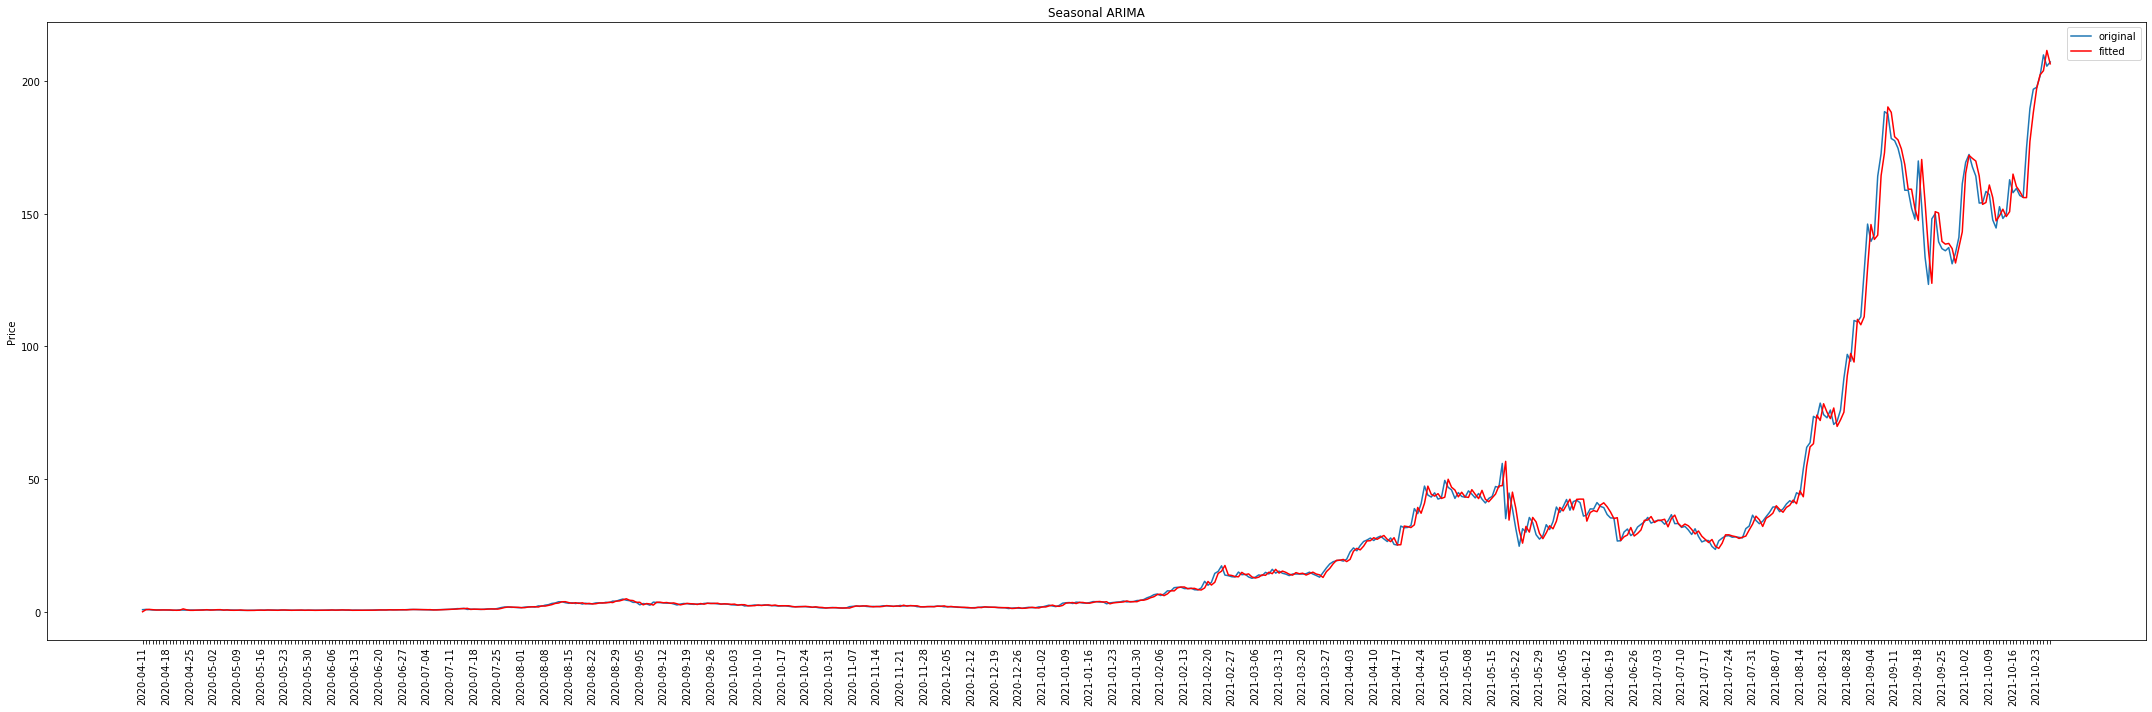

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df['close'], label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='fitted')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df['close'])**2))
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("Seasonal ARIMA")
ax = plt.gca()
for index, label in enumerate(ax.xaxis.get_ticklabels()):
  if index % 7 != 0:
    label.set_visible(False)
plt.legend()
plt.tight_layout()
plt.savefig("sol-arima.jpg", bbox_inches="tight")
!dir
files.download("sol-arima.jpg")
plt.show()

In [ ]:
import datetime

start_date = df.last_valid_index()
end_date = "2021-12-31"
print (f"start: {start_date}")
print (f"end: {end_date}")

pred = results_ARIMA.predict(start=str(start_date), end=end_date, dynamic=True)
pred

start: 2021-10-27
end: 2021-12-31


2021-10-27    206.531196
2021-10-28    207.911598
2021-10-29    209.489286
2021-10-30    207.194892
2021-10-31    206.529250
                 ...    
2021-12-27    269.066061
2021-12-28    270.647603
2021-12-29    268.310295
2021-12-30    267.642672
2021-12-31    269.877418
Freq: D, Length: 66, dtype: float64

sample_data  solana-sol.csv  sol-arima.jpg  sol-arima-pred.jpg	sol.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

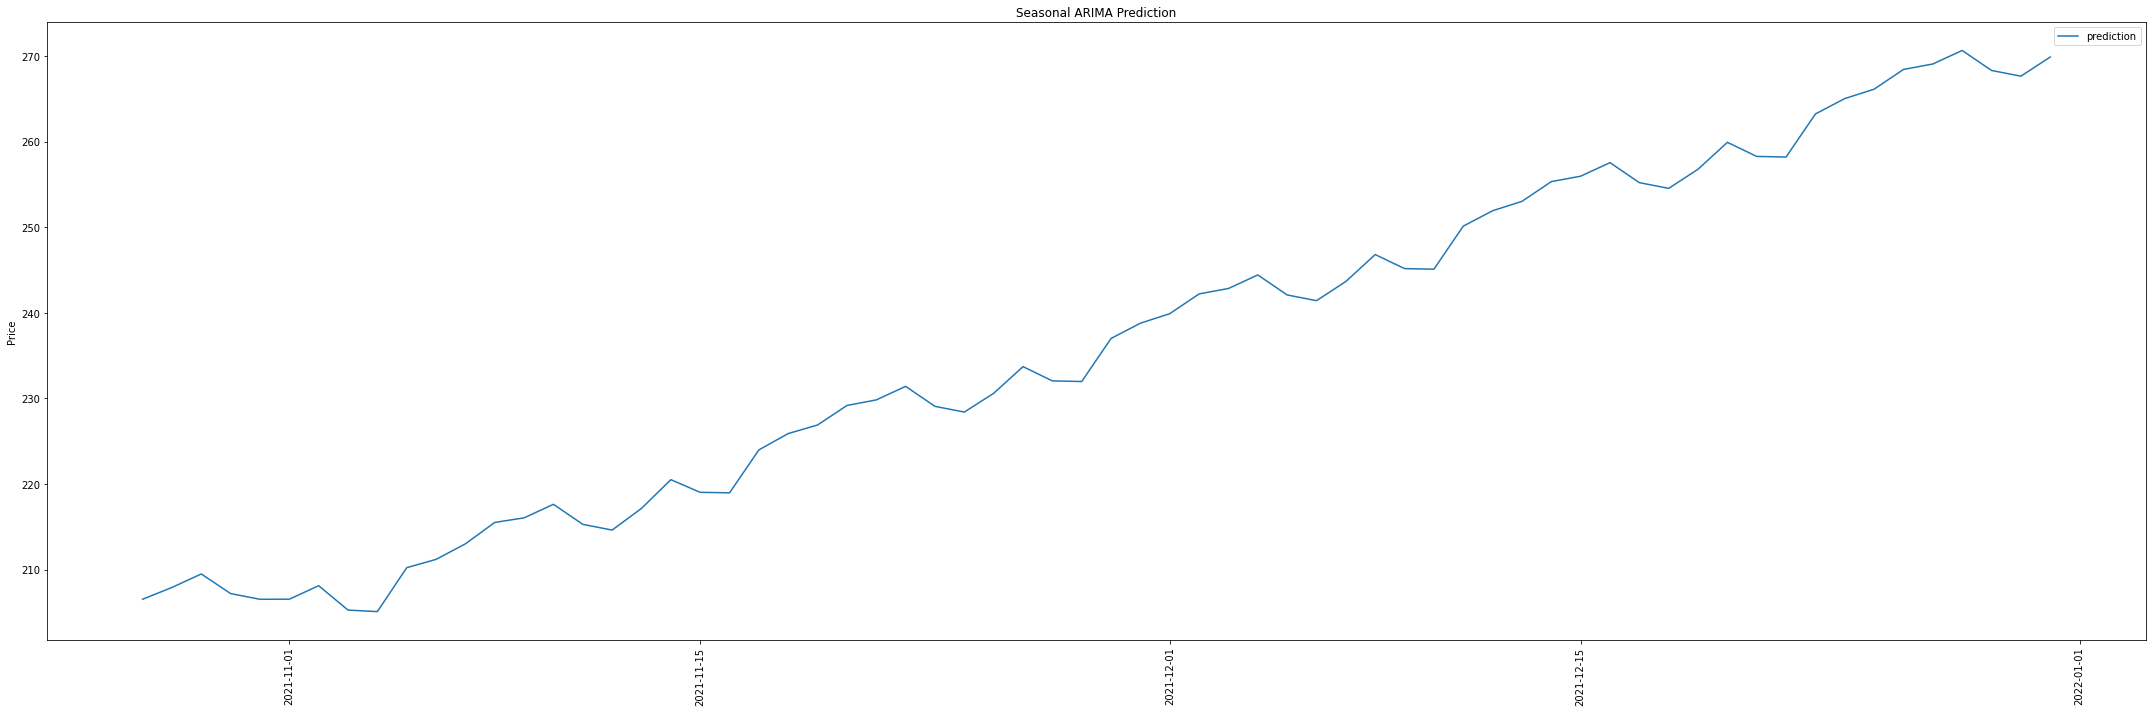

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(pred, label='prediction')
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("Seasonal ARIMA Prediction")
plt.legend()
plt.tight_layout()
plt.savefig("sol-arima-pred.jpg", bbox_inches="tight")
!dir
files.download("sol-arima-pred.jpg")
plt.show()